<a href="https://colab.research.google.com/github/pratikshaWagh12/machine_learning_projects/blob/main/Project_3_wildBlueberryPollinationSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install matplotlib-venn


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.9 MB/s eta 0:00:00


In [ ]:

!pip3 install catboost

from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [12]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import (accuracy_score,
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix, mean_squared_error, mean_absolute_error)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor

import numpy as np
from sklearn.model_selection import train_test_split

# Ignore all warnings (not recommended)
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
# show all columns in functions like head()
pd.set_option('display.max_columns', None)

# helper functions
def rem_out(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
        return df

def add_spines(colour = '#425169', linewidth = 2):
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines[['bottom', 'left', 'top', 'right']].set_color(colour)
    ax.spines[['bottom', 'left', 'top', 'right']].set_linewidth(linewidth)

def crossdf(col1, col2):
    crossdf = pd.crosstab(df[col1], df[col2], margins=True, margins_name='Total')
    crossdf = crossdf.reset_index()
    return crossdf


In [13]:
df = pd.read_csv('/content/sample_data/WildBlueberryPollinationSimulationData.csv', low_memory=False)
# df = df.drop(columns='Row#')
df.head()
df1 = rem_out(df, ['honeybee'])

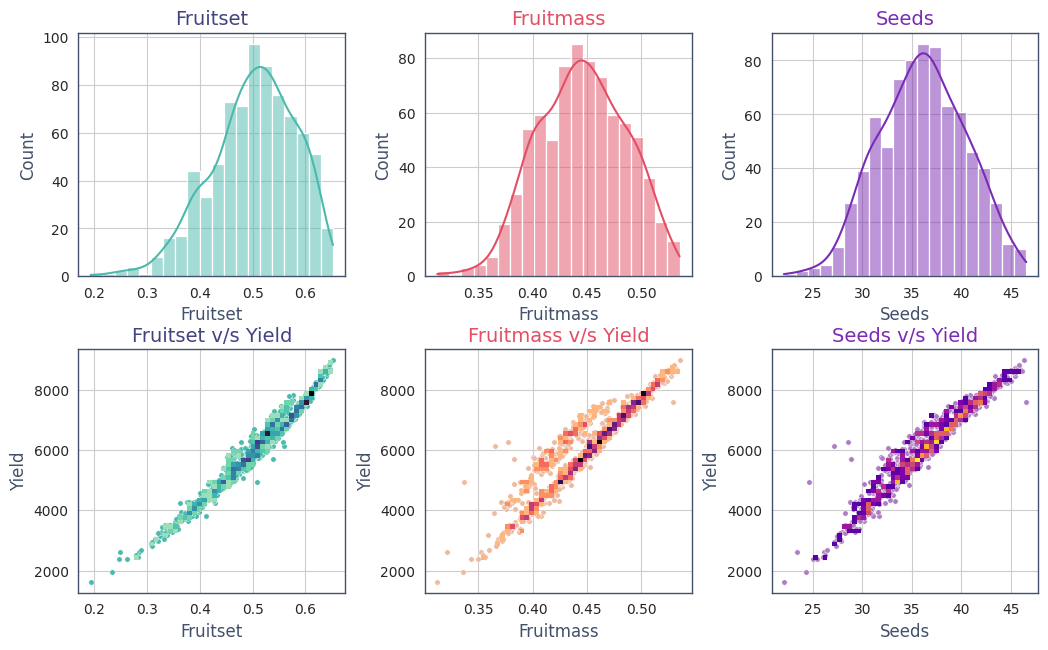

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 7))

plt.subplot(2, 3 ,4)
# sns.kdeplot(x='fruitset', y='seeds', data=df, levels=5, color="#356c9c", linewidths=1)
sns.scatterplot(x='fruitset', y='yield', data=df, s=15, color="#4bb9ab")
sns.histplot(x='fruitset', y='yield', data=df, bins=50, pthresh=.05, cmap='mako_r')
plt.title('Fruitset v/s Yield', fontsize=14).set_color('#424381')
plt.xlabel('Fruitset', fontsize= 12).set_color('#425169')
plt.ylabel('Yield', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)

plt.subplot(2, 3 ,5)
# sns.kdeplot(x='fruitset', y='seeds', data=df, levels=5, color="#356c9c", linewidths=1)
sns.scatterplot(x='fruitmass', y='yield', data=df, s=15, color="#eeb99e")
sns.histplot(x='fruitmass', y='yield', data=df, bins=50, pthresh=.05, cmap='magma_r')
plt.title('Fruitmass v/s Yield', fontsize=14).set_color('#e34e65')
plt.xlabel('Fruitmass', fontsize= 12).set_color('#425169')
plt.ylabel('Yield', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)

plt.subplot(2, 3 ,6)
# sns.kdeplot(x='fruitset', y='seeds', data=df, levels=5, color="#356c9c", linewidths=1)
sns.scatterplot(x='seeds', y='yield', data=df, s=15, color="#ad7dc2")
sns.histplot(x='seeds', y='yield', data=df, bins=50, pthresh=.05, cmap='plasma')
plt.title('Seeds v/s Yield', fontsize=14).set_color('#7a2cb4')
plt.xlabel('Seeds', fontsize= 12).set_color('#425169')
plt.ylabel('Yield', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)

plt.subplot(2, 3 ,1)
sns.histplot(df['fruitset'], bins=20, kde=True, color='#4bb9ab')
plt.xlabel('Fruitset', fontsize= 12).set_color('#425169')
plt.ylabel('Count', fontsize= 12).set_color('#425169')
plt.title('Fruitset', fontsize=14).set_color('#424381')
add_spines(linewidth=1)

plt.subplot(2, 3 ,2)
sns.histplot(df['fruitmass'], bins=20, kde=True, color='#e34e65')
plt.xlabel('Fruitmass', fontsize= 12).set_color('#425169')
plt.ylabel('Count', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)
plt.title('Fruitmass', fontsize=14).set_color('#e34e65')

plt.subplot(2, 3 ,3)
sns.histplot(df['seeds'], bins=20, kde=True, color='#7a2cb4')
plt.xlabel('Seeds', fontsize= 12).set_color('#425169')
plt.ylabel('Count', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)
plt.title('Seeds', fontsize=14).set_color('#7a2cb4')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

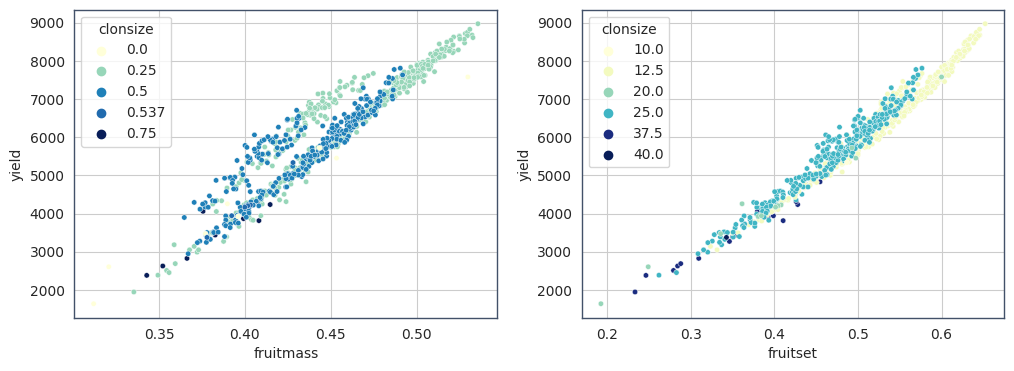

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2 ,1)
sns.scatterplot(x='fruitmass', y='yield', data=df1, s=15, hue='honeybee', palette='YlGnBu')
plt.legend(title='clonsize', loc='upper left')
add_spines(linewidth=1)

plt.subplot(1, 2 ,2)
sns.scatterplot(x='fruitset', y='yield', data=df1, s=15, hue='clonesize', palette='YlGnBu')
plt.legend(title='clonsize', loc='upper left')
add_spines(linewidth=1)

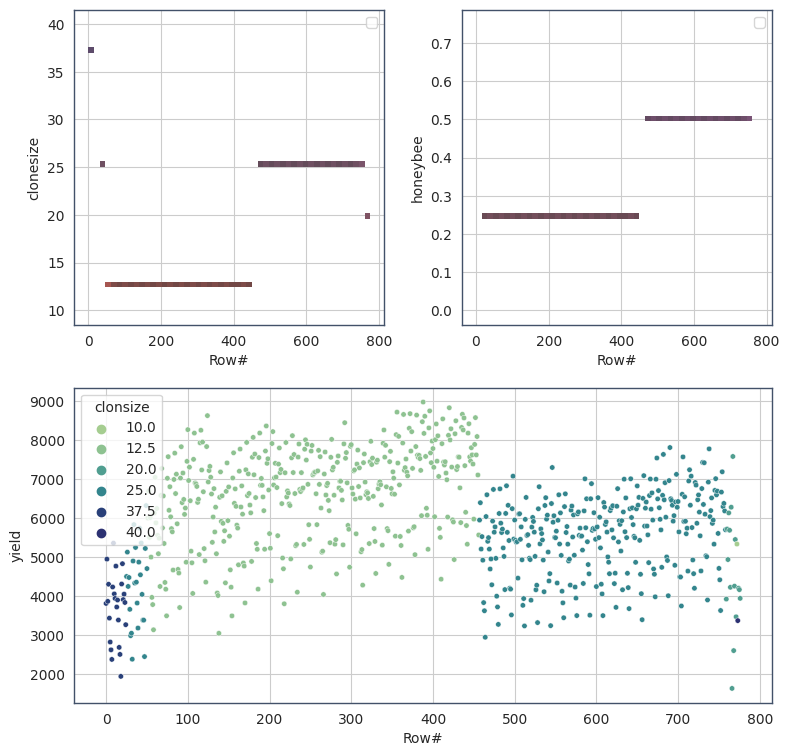

In [16]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(hspace=0.8)
grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.25)

plt.subplot(grid[0, 0])
sns.histplot(x='Row#', y='clonesize', data=df, bins=50, pthresh=.05, cmap='magma_r', hue='clonesize')
plt.legend()
add_spines(linewidth=1)
plt.subplot(grid[0, 1])
sns.histplot(x='Row#', y='honeybee', data=df1, bins=50, pthresh=.05, cmap='mako', hue = 'honeybee')
plt.legend()
add_spines(linewidth=1)

plt.subplot(grid[1, :])
sns.scatterplot(x='Row#', y='yield', data=df, s=15, hue='clonesize', palette='crest')
plt.legend(title='clonsize', loc='upper left')
add_spines(linewidth=1)

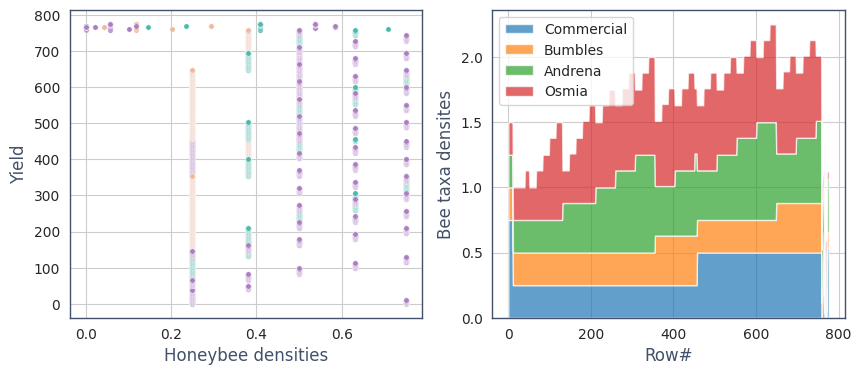

In [17]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(x='honeybee', y='Row#', data=df1, s=15, color="#ad7dc2")
sns.scatterplot(x='bumbles', y='Row#', data=df1, s=15, color="#eeb99e")
sns.scatterplot(x='andrena', y='Row#', data=df1, s=15, color="#4bb9ab")
sns.scatterplot(x='osmia', y='Row#', data=df1, s=15, color="#ad7dc2")
df1['beesum'] = df1['osmia'] +  df1['andrena'] +df1['bumbles'] + df1['honeybee']
plt.xlabel('Honeybee densities', fontsize= 12).set_color('#425169')
plt.ylabel('Yield', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)

plt.subplot(1, 2, 2)
plt.stackplot(df1['Row#'], df1.honeybee, df1.bumbles, df1.andrena, df1.osmia, labels=['Commercial', 'Bumbles', 'Andrena', 'Osmia'], alpha=0.7)
plt.legend(loc='upper left')
plt.xlabel('Row#', fontsize= 12).set_color('#425169')
plt.ylabel('Bee taxa densites', fontsize= 12).set_color('#425169')
add_spines(linewidth=1)

In [18]:
crossdf('AverageRainingDays', 'MaxOfUpperTRange').style.background_gradient(cmap='Purples')


MaxOfUpperTRange,AverageRainingDays,69.700000,77.400000,86.000000,89.000000,94.600000,Total
0,0.060000,0,0,15,1,0,16
1,0.100000,46,48,49,0,49,192
2,0.260000,48,48,49,0,49,194
3,0.390000,43,46,50,1,48,188
4,0.560000,44,46,49,0,48,187
5,Total,181,188,212,2,194,777


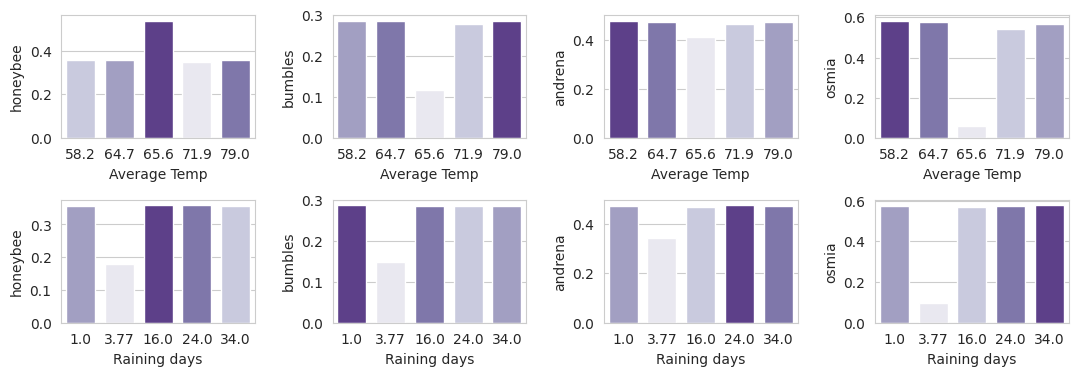

In [19]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(13, 4))
fig.subplots_adjust(wspace=0.4, hspace = 0.5)

bees = ['honeybee', 'bumbles', 'andrena', 'osmia']
temp_bee = df1.groupby(['AverageOfUpperTRange'])[bees].mean().reset_index()
rain_bee = df1.groupby(['RainingDays'])[bees].mean().reset_index()

for i, col in enumerate(bees):
    plt.subplot(2, 4 ,i+1)
    sns.barplot(temp_bee, x='AverageOfUpperTRange', y = col, palette = 'Purples', hue=col, dodge=False, width=0.75)
    plt.legend().set_visible(False)
    plt.xlabel('Average Temp')

for i, col in enumerate(bees):
    plt.subplot(2, 4 ,i+5)
    sns.barplot(rain_bee, x='RainingDays', y = col, palette = 'Purples', hue=col, dodge=False, width=0.75)
    plt.legend().set_visible(False)
    plt.xlabel('Raining days')

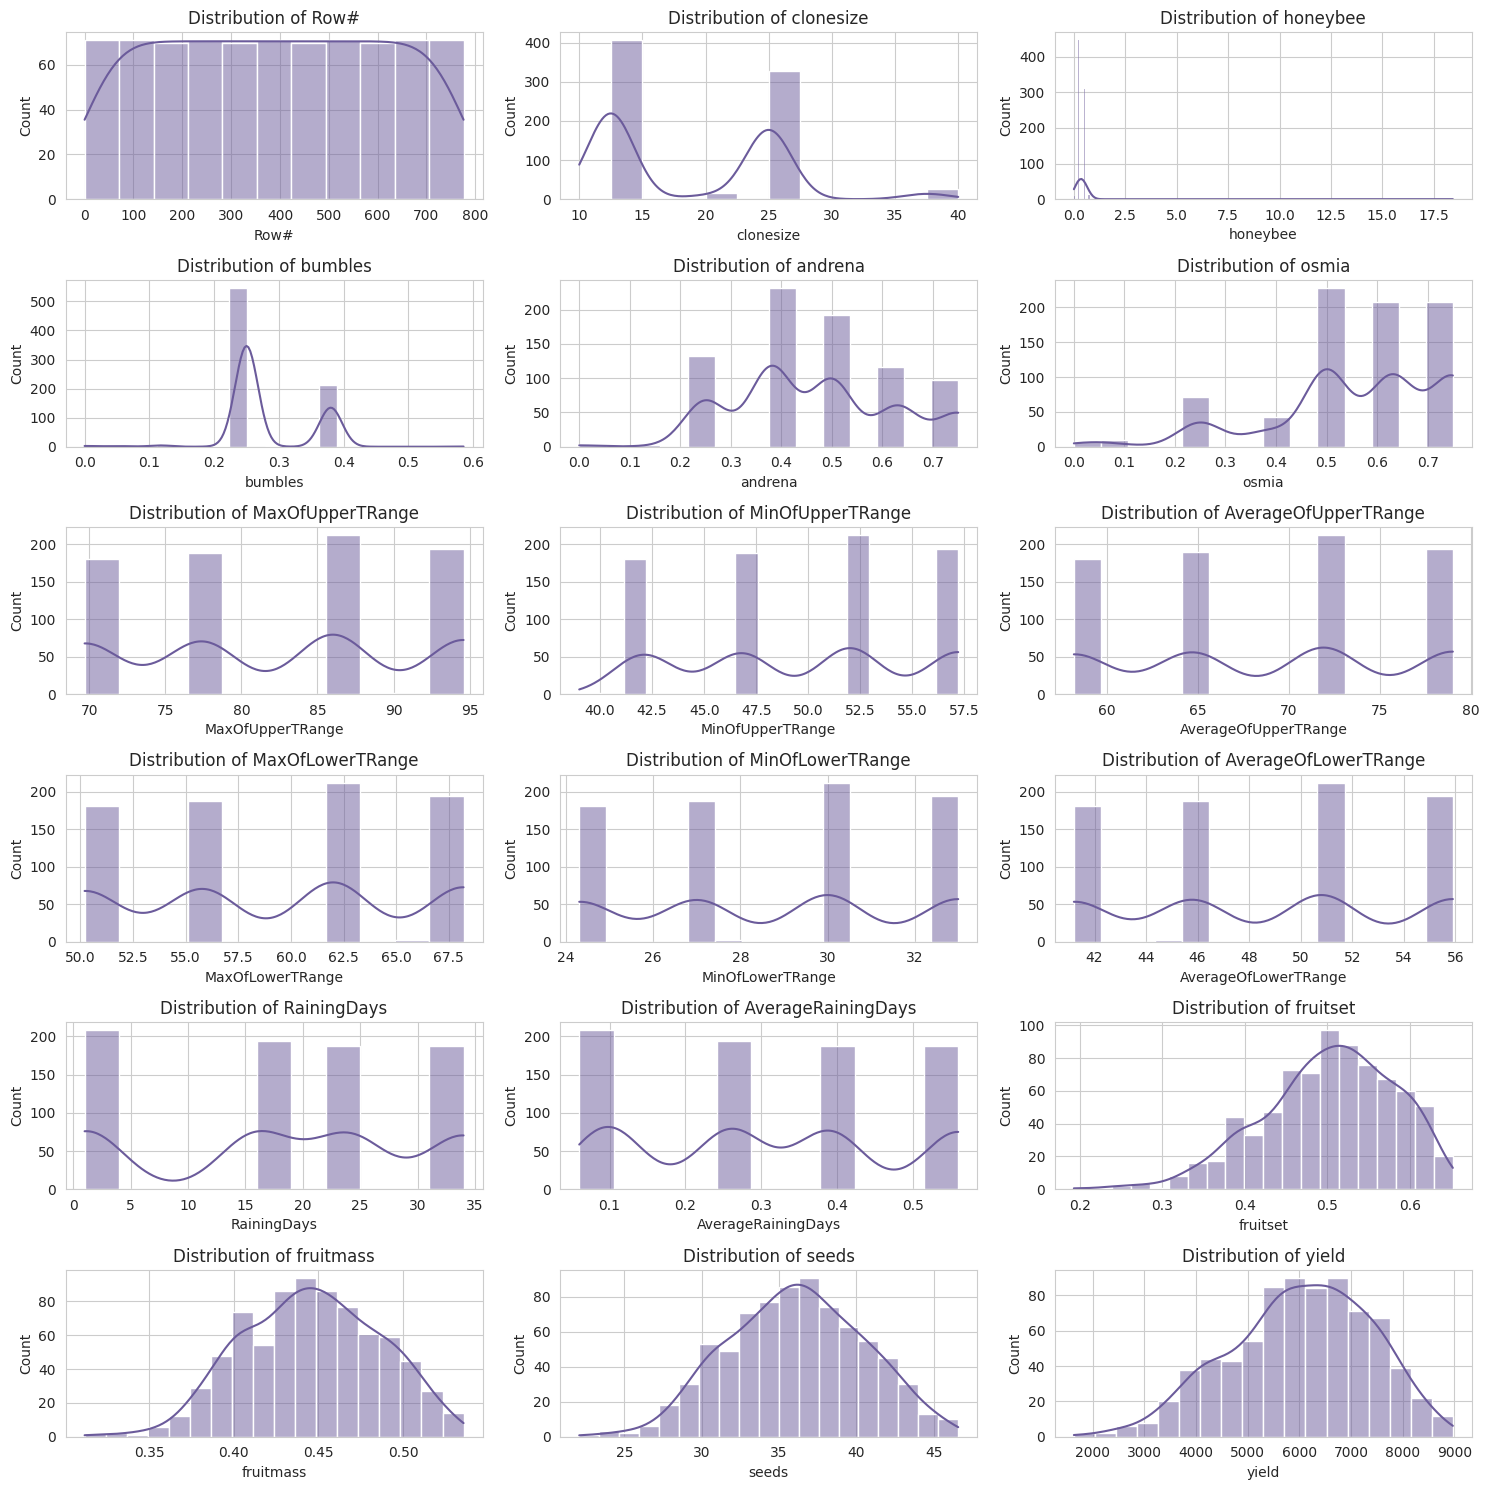

In [20]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through each column and plot its distribution
for i, column in enumerate(df.columns):
    ax = axes[i // 3, i % 3]
    sns.histplot(df[column], ax=ax, kde=True, color='#6b5b9b')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Show the plots
plt.tight_layout()
plt.show()

In [23]:
df = pd.read_csv('/content/sample_data/WildBlueberryPollinationSimulationData.csv', low_memory=False)
continuous_features = ['fruitset', 'fruitmass', 'seeds']

# df_nofruit = df.drop(columns = ['Row#', 'MinOfLowerTRange', 'MaxOfLowerTRange', 'MinOfUpperTRange', 'MaxOfUpperTRange']).copy()
df_nofruit = df.drop(columns = ['Row#']).copy()
df_nofruit = df_nofruit.drop(columns = continuous_features)

In [24]:
X = df_nofruit.drop('yield', axis=1)
y = df_nofruit['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(621, 13)
(156, 13)


In [26]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    bvd = {}
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test._get_numeric_data())
#         scores['xgb_mse'] = mean_squared_error(y_test, y_pred)
#         scores['xgb_mae'] = mean_absolute_error(y_test, y_pred)
#         scores['xgb_rmse'] = np.sqrt(scores['xgb_mse'])
        mse = mean_squared_error(y_test, y_pred)
        scores['xgb_rmse'] = np.sqrt(mse)
        models.append(xgb)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestRegressor()
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
#         scores['rf_mse'] = mean_squared_error(y_test, y_pred)
#         scores['rf_mae'] = mean_absolute_error(y_test, y_pred)
#         scores['rf_rmse'] = np.sqrt(scores['rf_mse'])
        mse = mean_squared_error(y_test, y_pred)
        scores['rf_rmse'] = np.sqrt(mse)
        models.append(rf)

    if 'lr' in kwargs.keys() and kwargs['lr']:
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        scores['lr_rmse'] = np.sqrt(mse)
        models.append(lr)
    return scores, models


In [27]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, lr=True)
print(scores)

{'xgb_rmse': 299.85778998841045, 'rf_rmse': 419.77091855027294, 'lr_rmse': 455.02431847850363}


In [28]:
features = [feature for feature in df.columns if feature != 'yield']
mutual_df = df[features]
y = df['yield']

mutual_info = mutual_info_regression(mutual_df, y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Feature_MI"] ).style.background_gradient("Purples")

,Feature_MI
fruitset,1.948853
seeds,1.664007
fruitmass,1.588506
Row#,0.260988
RainingDays,0.216236
AverageRainingDays,0.212023
clonesize,0.182186
MaxOfLowerTRange,0.123658
MaxOfUpperTRange,0.123449
AverageOfLowerTRange,0.123369


In [31]:
df_fruit = df1.drop(columns = ['Row#']).copy()
# df_fruit = df[['fruitset', 'fruitmass', 'seeds', 'yield']]


X = df_fruit.drop('yield', axis=1)
y = df_fruit['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(618, 17)
(155, 17)


In [32]:
scores,models = modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, lr=True)
print(scores)

{'xgb_rmse': 141.56919073816772, 'rf_rmse': 142.2951962008135, 'lr_rmse': 121.42870601361763}


In [ ]:
# tunning XGB model

In [38]:
X = df_nofruit.drop('yield', axis=1)
y = df_nofruit['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# finding the number of estimators required
import xgboost as xgb
from sklearn import metrics
def modelfit(alg, X_train, y_train, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train, label=y_train)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        # cv result stores the error at each round
        # cvresult.shape[0] contains the number of estimators (boosting rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print('Optimal number of estimators: (n_estimators)', cvresult.shape[0])

     # Fit the algorithm on the data
    alg.fit(X_train, y_train, eval_metric='auc')

    # Predict training set:
    y_train_pred = alg.predict(X_train)

    print("\nModel Report")
    print('RMSE on train data:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

    return alg

In [39]:
xgb1 = XGBRegressor()
modelfit(xgb1, X_train, y_train)
parameters = xgb1.get_params()

Optimal number of estimators: (n_estimators) 43

Model Report
RMSE on train data: 96.50621872846598


In [40]:
param_test0 = {
#  'learning_rate': [0.1, 0.2, 0.01, 0.001, 0.05, 0.005]
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}
gsearch0 = GridSearchCV(estimator = XGBRegressor(n_estimators=43),
 param_grid = param_test0, scoring='neg_root_mean_squared_error',n_jobs=1, cv=5, verbose=3)
gsearch0.fit(X_train,y_train)
gsearch0.best_params_, gsearch0.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ..............learning_rate=0.1;, score=-228.523 total time=   1.4s
[CV 2/5] END ..............learning_rate=0.1;, score=-284.467 total time=   0.1s
[CV 3/5] END ..............learning_rate=0.1;, score=-389.190 total time=   0.0s
[CV 4/5] END ..............learning_rate=0.1;, score=-271.608 total time=   0.0s
[CV 5/5] END ..............learning_rate=0.1;, score=-379.315 total time=   0.0s
[CV 1/5] END ..............learning_rate=0.2;, score=-208.848 total time=   0.0s
[CV 2/5] END ..............learning_rate=0.2;, score=-249.462 total time=   0.0s
[CV 3/5] END ..............learning_rate=0.2;, score=-423.242 total time=   0.1s
[CV 4/5] END ..............learning_rate=0.2;, score=-210.348 total time=   0.0s
[CV 5/5] END ..............learning_rate=0.2;, score=-335.486 total time=   0.0s
[CV 1/5] END ..............learning_rate=0.3;, score=-191.091 total time=   0.0s
[CV 2/5] END ..............learning_rate=0.3;, sc

({'learning_rate': 0.3}, -269.74894805707856)

In [41]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(5,11,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(n_estimators=43, learning_rate = 0.3),
 param_grid = param_test1, scoring='neg_root_mean_squared_error',n_jobs=1, cv=5, verbose=3)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=3, min_child_weight=5;, score=-244.174 total time=   0.6s
[CV 2/5] END max_depth=3, min_child_weight=5;, score=-302.090 total time=   0.5s
[CV 3/5] END max_depth=3, min_child_weight=5;, score=-399.524 total time=   0.2s
[CV 4/5] END max_depth=3, min_child_weight=5;, score=-264.550 total time=   0.0s
[CV 5/5] END max_depth=3, min_child_weight=5;, score=-291.392 total time=   0.0s
[CV 1/5] END max_depth=3, min_child_weight=7;, score=-250.701 total time=   0.0s
[CV 2/5] END max_depth=3, min_child_weight=7;, score=-315.030 total time=   0.0s
[CV 3/5] END max_depth=3, min_child_weight=7;, score=-403.410 total time=   0.0s
[CV 4/5] END max_depth=3, min_child_weight=7;, score=-295.613 total time=   0.0s
[CV 5/5] END max_depth=3, min_child_weight=7;, score=-252.160 total time=   0.0s
[CV 1/5] END max_depth=3, min_child_weight=9;, score=-255.356 total time=   0.0s
[CV 2/5] END max_depth=3, min_child_weight=9;, s

({'max_depth': 5, 'min_child_weight': 5}, -274.82734078919106)

In [42]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(n_estimators=43, max_depth=5,
 min_child_weight=5, learning_rate = 0.3),
 param_grid = param_test2, scoring='neg_root_mean_squared_error',n_jobs=1, cv=5, verbose=3)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ......................gamma=0.0;, score=-208.933 total time=   0.4s
[CV 2/5] END ......................gamma=0.0;, score=-269.235 total time=   0.4s
[CV 3/5] END ......................gamma=0.0;, score=-377.454 total time=   0.6s
[CV 4/5] END ......................gamma=0.0;, score=-239.553 total time=   0.0s
[CV 5/5] END ......................gamma=0.0;, score=-278.961 total time=   0.0s
[CV 1/5] END ......................gamma=0.1;, score=-208.933 total time=   0.0s
[CV 2/5] END ......................gamma=0.1;, score=-269.235 total time=   0.0s
[CV 3/5] END ......................gamma=0.1;, score=-377.454 total time=   0.0s
[CV 4/5] END ......................gamma=0.1;, score=-239.553 total time=   0.0s
[CV 5/5] END ......................gamma=0.1;, score=-278.961 total time=   0.1s
[CV 1/5] END ......................gamma=0.2;, score=-208.933 total time=   0.0s
[CV 2/5] END ......................gamma=0.2;, sc

({'gamma': 0.0}, -274.82734078919106)

In [43]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,11)],
 'colsample_bytree':[i/10.0 for i in range(6,11)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(n_estimators=43, max_depth=5,
 min_child_weight=5, learning_rate = 0.3, gamma = 0.0),
 param_grid = param_test3, scoring='neg_root_mean_squared_error',n_jobs=1, cv=5, verbose=3)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END colsample_bytree=0.6, subsample=0.6;, score=-222.455 total time=   0.3s
[CV 2/5] END colsample_bytree=0.6, subsample=0.6;, score=-279.338 total time=   0.4s
[CV 3/5] END colsample_bytree=0.6, subsample=0.6;, score=-411.144 total time=   0.5s
[CV 4/5] END colsample_bytree=0.6, subsample=0.6;, score=-236.118 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, subsample=0.6;, score=-265.159 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, subsample=0.7;, score=-217.015 total time=   0.1s
[CV 2/5] END colsample_bytree=0.6, subsample=0.7;, score=-258.071 total time=   0.0s
[CV 3/5] END colsample_bytree=0.6, subsample=0.7;, score=-389.688 total time=   0.0s
[CV 4/5] END colsample_bytree=0.6, subsample=0.7;, score=-247.431 total time=   0.0s
[CV 5/5] END colsample_bytree=0.6, subsample=0.7;, score=-209.412 total time=   0.0s
[CV 1/5] END colsample_bytree=0.6, subsample=0.8;, score=-213.539 total time=   0.0s
[CV

({'colsample_bytree': 0.7, 'subsample': 0.7}, -262.42124361446236)

In [44]:
param_test4 = {
#  'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
#  'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100]

    'reg_alpha':[100, 200, 300, 400, 500],
    'reg_lambda':[1e-5, 2e-5, 3e-5, 4e-5, 5e-5, 6e-5, 7e-5, 8e-5, 9e-5, 1e-6]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor(n_estimators=43, max_depth=5,
 min_child_weight=5, learning_rate = 0.3, gamma = 0.0, subsample = 0.7, colsample_bytree=0.7),
 param_grid = param_test4, scoring='neg_root_mean_squared_error',n_jobs=1, cv=3, verbose=3)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END reg_alpha=100, reg_lambda=1e-05;, score=-232.296 total time=   0.5s
[CV 2/3] END reg_alpha=100, reg_lambda=1e-05;, score=-352.232 total time=   0.2s
[CV 3/3] END reg_alpha=100, reg_lambda=1e-05;, score=-257.651 total time=   0.1s
[CV 1/3] END reg_alpha=100, reg_lambda=2e-05;, score=-232.296 total time=   0.0s
[CV 2/3] END reg_alpha=100, reg_lambda=2e-05;, score=-352.232 total time=   0.0s
[CV 3/3] END reg_alpha=100, reg_lambda=2e-05;, score=-257.651 total time=   0.1s
[CV 1/3] END reg_alpha=100, reg_lambda=3e-05;, score=-232.296 total time=   0.1s
[CV 2/3] END reg_alpha=100, reg_lambda=3e-05;, score=-352.232 total time=   0.1s
[CV 3/3] END reg_alpha=100, reg_lambda=3e-05;, score=-257.651 total time=   0.2s
[CV 1/3] END reg_alpha=100, reg_lambda=4e-05;, score=-232.296 total time=   1.5s
[CV 2/3] END reg_alpha=100, reg_lambda=4e-05;, score=-352.232 total time=   0.4s
[CV 3/3] END reg_alpha=100, reg_lambda=4e-05;, 

({'reg_alpha': 200, 'reg_lambda': 9e-05}, -277.59266124632484)

In [45]:
model = XGBRegressor(n_estimators=43, max_depth=5,
 min_child_weight=5, learning_rate = 0.3, gamma = 0.0, subsample = 0.7, colsample_bytree=0.7, reg_alpha = 200, reg_lambda = 9e-5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse

300.03076334299436

In [47]:
!pip install -Uqqq pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.7 MB/s eta 0:

In [49]:
pip uninstall scipy

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.10.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-41284840.3.18.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.10.1


In [50]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 13.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [51]:
from pycaret.regression import *
pycaret_automl = setup(data=df_nofruit, target = 'yield', session_id=42)

,Description,Value
0,Session id,42
1,Target,yield
2,Target type,Regression
3,Original data shape,"(777, 14)"
4,Transformed data shape,"(777, 14)"
5,Transformed train set shape,"(543, 14)"
6,Transformed test set shape,"(234, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [52]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,165.8817,58901.4181,237.8821,0.9654,0.0527,0.0322,1.1180
gbr,Gradient Boosting Regressor,199.4803,79909.8198,276.1256,0.9527,0.0581,0.0366,0.1890
et,Extra Trees Regressor,208.9099,86060.4250,289.8389,0.9496,0.0619,0.0401,0.3400
xgboost,Extreme Gradient Boosting,205.3499,103360.5367,304.1314,0.9398,0.0683,0.0391,0.1390
lightgbm,Light Gradient Boosting Machine,191.9424,106903.4808,312.8110,0.9392,0.0695,0.0384,0.4420
rf,Random Forest Regressor,210.9054,110499.9436,323.0054,0.9360,0.0717,0.0417,0.4150
dt,Decision Tree Regressor,265.5858,160832.2907,392.9414,0.9067,0.0926,0.0508,0.0760
knn,K Neighbors Regressor,385.7090,282874.3602,525.0696,0.8338,0.1073,0.0746,0.1060
ada,AdaBoost Regressor,443.2155,321024.7654,565.0349,0.8118,0.1152,0.0829,0.3000
lasso,Lasso Regression,490.4249,379192.7812,611.2945,0.7775,0.1297,0.0906,0.0540


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [53]:
base_predictions = predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,175.1977,86761.0083,294.5522,0.9561,0.0559,0.0325


In [54]:
tuned_model = tune_model(best_model)
tuned_predictions = predict_model(tuned_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,183.5101,44734.9794,211.5065,0.9711,0.0426,0.0327
1,203.1518,70072.6895,264.7125,0.9568,0.0481,0.0350
2,202.2170,58614.9602,242.1053,0.9686,0.0524,0.0354
3,208.7832,138006.8006,371.4927,0.9171,0.1229,0.0529
4,197.1563,65941.5461,256.7909,0.9735,0.0610,0.0395
5,184.9494,69079.6134,262.8300,0.9532,0.0482,0.0310
6,178.9309,52429.9770,228.9759,0.9690,0.0407,0.0314
7,215.3344,67049.2612,258.9387,0.9566,0.0564,0.0396
8,203.3015,56003.9786,236.6516,0.9635,0.0412,0.0346


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,175.1977,86761.0083,294.5522,0.9561,0.0559,0.0325


In [61]:
final_model = finalize_model(tuned_model)

save_model(final_model, model_name="my_final_regression_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['clonesize', 'honeybee', 'bumbles',
                                              'andrena', 'osmia',
                                              'MaxOfUpperTRange',
                                              'MinOfUpperTRange',
                                              'AverageOfUpperTRange',
                                              'MaxOfLowerTRange',
                                              'MinOfLowerTRange',
                                              'AverageOfLowerTRange',
                                              'RainingDays',
                                              'AverageRainingDays'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_fre